# TP Caractéristiques d'un son

## 1. Utiliser un notebook

Dans ce TP, tu vas utiliser un _notebook_ Jupyter qui est un document « mixte », contenant du texte et du code Python. Ces lignes, que tu es en train de lire, font partie d'un _notebook_ .

Dans la suite de ce _notebook_ , on va donc utiliser du code Python. Pas d'inquiétude si tu ne le comprends pas. Ce code est uniquement destiné à valider le fonctionnement des notebooks et tu ne vas utiliser que des choses très simples.
Un _notebook_ Jupyter te permet de de modifier et d'exécuter des scripts Python, directement dans le navigateur, sans aucune installation de ta part car ici le code Python est interprété sur une machine distante (un serveur distant).

En haut du _notebook_ , tu dois voir une barre, contenant&nbsp;:
* un titre pour le _notebook_ ;
* une barre de menus avec les entrées `File`, `Insert`, `Cell`, `Kernel`;
* et une barre de boutons qui sont des raccourcis vers certains menus fréquemment utilisés. Si tu laisses ta souris au dessus d'un bouton, un petit texte apparaît, indiquant à quelle fonction correspond ce bouton.

Un _notebook_ est constitué d'une suite de cellules, soit textuelles, soit contenant du code. Les cellules de code sont facilement reconnaissables, elles sont précédées de `Entrée [ ]:`. La cellule qui suit celle que tu es en train de lire est une cellule de code.

Pour commencer, sélectionne la cellule de code ci-dessous avec ta souris et appuie dans la barre de boutons sur celui en forme de flèche triangulaire vers la droite (Exécuter).

In [1]:
20*30

600

Comme tu le vois, la cellule est « exécutée » (on dira plus volontiers « évaluée »), et on passe à la cellule suivante.

Alternativement tu peux simplement taper au clavier ***Shift+Enter***, ou, selon les claviers, ***Maj-Entrée***, pour obtenir le même effet (<kbd>SHIFT</kbd>+<kbd>ENTER</kbd> ou <kbd>MAJ</kbd>+<kbd>ENTRÉE</kbd>). D'une manière générale, il est important d'apprendre et d'utiliser les raccourcis clavier, cela te fera gagner beaucoup de temps par la suite.

La façon habituelle d'*exécuter* l'ensemble du notebook consiste à partir de la première cellule, et à taper  <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> (ou <kbd>MAJ</kbd>+<kbd>ENTRÉE</kbd>) jusqu'au bout du notebook, en n'allant pas trop vite, c'est-à-dire en attendant le résultat de l'exécution de chaque cellule.

Lorsqu'une cellule de code a été évaluée, Jupyter ajoute sous la cellule `Entrée` une cellule `Out` qui donne le résultat du fragment Python, soit ci-dessus 600.

Jupyter ajoute également un nombre entre les crochets pour afficher, par exemple ci-dessus, `Entrée [1]:`. Ce nombre te permet de retrouver l'ordre dans lequel les cellules ont été évaluées.

Tu peux naturellement modifier ces cellules de code pour faire des essais.

Tu peux également évaluer tout le notebook en une seule fois en utilisant le menu `Cell` -> `Run All`.

Si tu fais trop de modifications, ou si tu perds le fil de ce que tu as évalué, il peut être utile de redémarrer ton interpréteur. Le menu `Kernel` → `Restart` te permet de faire cela.

## 2. Travail à réaliser

1. Evaluer tout le notebook en une seule fois en utilisant le menu `Cell` -> `Run All`.  
2. Ecouter les deux fichiers son en cliquant sur les boutons en forme de triangle un peu plus bas dans le notebook. 
3. Visualiser les signaux temporels associés à ces deux sons (observer les figures 1 et 2 plus bas dans le notebook)
4. Répondre aux questions plus bas dans le notebook directement dans les cellules textuelles (pour pouvoir écrire dans une cellule de texte, il faut cliquer deux fois dessus)


In [2]:
# Importation des bibliothèques
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft as fft  # fft permet de calculer la transformée de Fourier 
import scipy.io.wavfile as wav # wavefile permet de lire un fichier .wav
from IPython.display import Audio  # Audio est un widget Jupyter qui permet de jouer un son via le navigateur
import os, os.path

## 3. Code permettant d'écouter et de visualiser deux signaux sonores

### Choix et lecture de deux fichiers son

`filename_1` et `filename_2` sont deux chaînes de caractères contenant les chemins du fichier `.wav` contenant les sons à étudier. Il y a en plusieurs de disponible qui sont extraits de la [base de données du Philharmonia Orchestra](https://www.philharmonia.co.uk/explore/sound_samples). :
* `Sons/flute_B4_1_piano_normal.wav` : note B4 jouée par une flûte
* `Sons/flute_D5_1_piano_normal.wav` : note D5 jouée par une flûte
* `Sons/flute_C5_1_piano_normal.wav` : note C5 jouée par une flûte
* `Sons/english-horn_C5_1_fortissimo_normal` : note C5 jouée par un cor anglais


Dans un premier temps, nous allons comparer les deux premiers sons (comparaison 1) puis dans un second temps, nous allons comparer les deux derniers sons (comparaison 2).

In [3]:
# Variante pour ouvrir une fenetre pour choisir deux fichiers son
# from tkinter import Tk
# from tkinter import filedialog
# import os, os.path
# rep_actuel = os.getcwd()
# root=Tk()
# root.withdraw()
# filenames = filedialog.askopenfilenames(parent=root,title='Selectionner deux fichiers',initialdir=rep_actuel,filetypes=[("fichiers wav", "*.wav")])
# filename_1 = filenames[0]
# filename_2 = filenames[1]


In [4]:
# Fichiers utilisés pour la 1ère comparaison
filename_1 = 'Sons/flute_B4_1_piano_normal.wav'
filename_2 = 'Sons/flute_D5_1_piano_normal.wav'

# Fichiers utilisés pour la 2ème comparaison
# filename_1 = 'Sons/flute_C5_1_piano_normal.wav'
# filename_2 = 'Sons/english-horn_C5_1_fortissimo_normal.wav'


filename_base_1=os.path.basename(filename_1)
filename_base_2=os.path.basename(filename_2)

# Lors de la lecture du fichier `.wav`, wavefile renvoie la fréquence d'échantillonnage (`f_sampling`) en hertz 
# et un ndarray contenant les échantillons (`sampled_wave`).
f_sampling_1, sampled_wave_1 = wav.read(filename_1)
f_sampling_2, sampled_wave_2 = wav.read(filename_2)

### Ecoute du premier fichier son

In [5]:
print(filename_1)
Audio(filename_1)

Sons/flute_B4_1_piano_normal.wav


### Ecoute du deuxième fichier son

In [6]:
print(filename_2)
Audio(filename_2)

Sons/flute_D5_1_piano_normal.wav


### Visualisation des signaux temporels des fichiers son

<IPython.core.display.Javascript object>


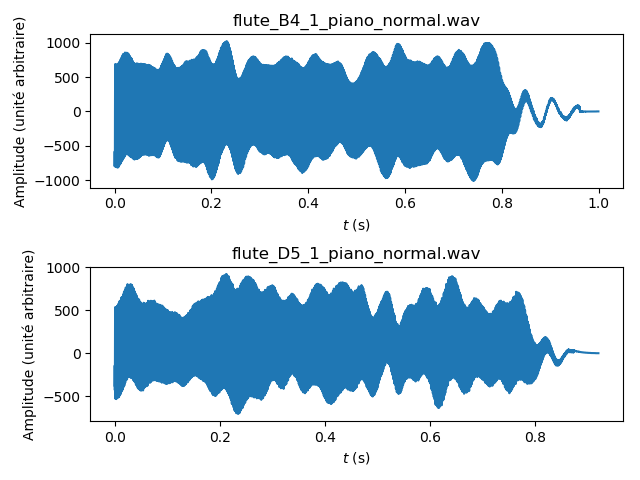

In [7]:
# On définit le nombre d'échantillons `N_samples` (c'est tout simplement le nombre d'éléments de `sampled_wave`)
# et la durée de l'échantillon `duration`.
N_samples_1 = sampled_wave_1.size
duration_1 = N_samples_1 / f_sampling_1
N_samples_2 = sampled_wave_2.size
duration_2 = N_samples_2 / f_sampling_2

# La période d'échantillonnage `T_sampling` permet d'obtenir les dates `t` des échantillons.
T_sampling_1 = 1 / f_sampling_1
t_1 = T_sampling_1 * np.arange(0, N_samples_1)
T_sampling_2 = 1 / f_sampling_2
t_2 = T_sampling_2 * np.arange(0, N_samples_2)



# Tracé des signaux temporels
fig1, (ax_1,ax_2) = plt.subplots(2,1)
# Premier fichier son
ax_1.plot(t_1, sampled_wave_1)
ax_1.set_xlabel(r'$t$ (s)')
ax_1.set_ylabel('Amplitude (unité arbitraire)')
ax_1.set_title(filename_base_1)
# Deuxième fichier son
ax_2.plot(t_2, sampled_wave_2)
ax_2.set_xlabel(r'$t$ (s)')
ax_2.set_ylabel('Amplitude (unité arbitraire)')
ax_2.set_title(filename_base_2)
fig1.tight_layout(pad=1)
fig1.show()

### Visualisation du début des signaux temporels des fichiers son ($2^{10}$ échantillons)

<IPython.core.display.Javascript object>


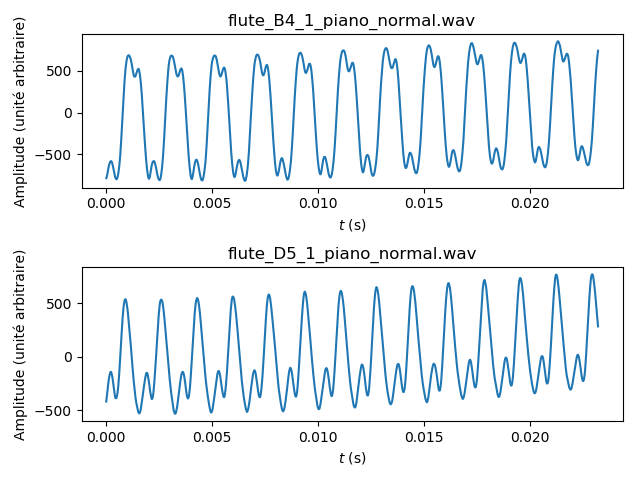

In [8]:
fig3, (ax_10, ax_20) = plt.subplots(2,1)
# Premier fichier son
ax_10.plot(t_1[:2**10], sampled_wave_1[:2**10])
ax_10.set_xlabel(r'$t$ (s)')
ax_10.set_ylabel('Amplitude (unité arbitraire)')
ax_10.set_title(filename_base_1)
# Deuxième fichier son
ax_20.plot(t_2[:2**10], sampled_wave_2[:2**10])
ax_20.set_xlabel(r'$t$ (s)')
ax_20.set_ylabel('Amplitude (unité arbitraire)')
ax_20.set_title(filename_base_2)
fig3.tight_layout(pad=1.0)
fig3.show()

### Visualisation des spectres des fichiers son

Passons à l'analyse spectrale numérique sur le nombre `N_samples_fft` réduit d'échantillons (pour que l'algorithme FFT fonctionne correctement, il faut que ce nombre soit une puissance de 2).

<IPython.core.display.Javascript object>


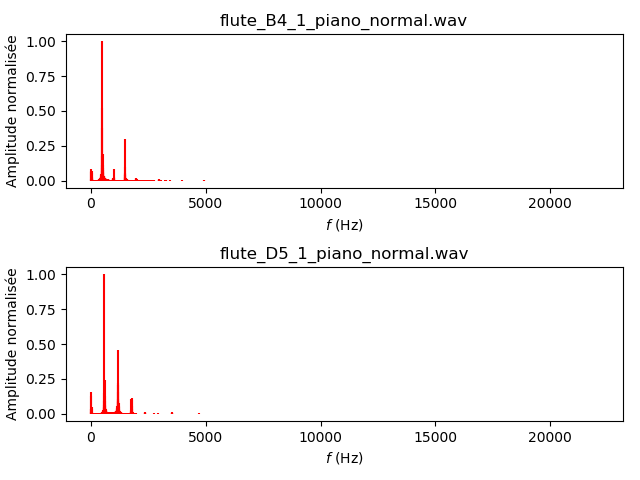

In [9]:
# Réalisation de l'analyse spectrale numérique sur le nombre `N_samples_fft` réduit d'échantillons
# (pour que l'algorithme FFT fonctionne correctement, il faut que ce nombre soit une puissance de 2).
N_samples_fft = 2**13
if N_samples_fft > N_samples_1 or N_samples_fft > N_samples_2:
    print('N_samples_fft trop grand')
amplitude_spectrum_1 = np.abs(fft.fft(sampled_wave_1[:N_samples_fft]))
phase_spectrum_1 = np.angle(fft.fft(sampled_wave_1[:N_samples_fft]))
normalized_amplitude_spectrum_1= amplitude_spectrum_1 / amplitude_spectrum_1.max()
amplitude_spectrum_2 = np.abs(fft.fft(sampled_wave_2[:N_samples_fft]))
phase_spectrum_2 = np.angle(fft.fft(sampled_wave_2[:N_samples_fft]))
normalized_amplitude_spectrum_2= amplitude_spectrum_2 / amplitude_spectrum_2.max()

# On définit les fréquences discrètes associées à l'analyse spectrale numérique 
# (le critère de Shannon impose la fréquence maximale donnée par l'analyse spectrale numérique
# comme étant égale à la moitié de la fréquence d'échantillonnage).
f_1 = f_sampling_1 * np.arange(0, N_samples_fft // 2) / N_samples_fft
f_2 = f_sampling_2 * np.arange(0, N_samples_fft // 2) / N_samples_fft

# Tracé des spectres fréquentiels
fig3, (ax_11,ax_12) = plt.subplots(2,1)
ax_11.vlines(f_1, [0], normalized_amplitude_spectrum_1[:N_samples_fft // 2], 'r')
ax_11.set_xlabel(r'$f$ (Hz)')
ax_11.set_ylabel('Amplitude normalisée')
ax_11.set_title(filename_base_1)
ax_12.vlines(f_2, [0], normalized_amplitude_spectrum_2[:N_samples_fft // 2], 'r')
ax_12.set_xlabel(r'$f$ (Hz)')
ax_12.set_ylabel('Amplitude normalisée')
ax_12.set_title(filename_base_2)
fig3.tight_layout(pad=1.0)
fig3.show()

## 4. Questions

### 4.1 Comparaison 1 : sons de deux notes différentes jouées par le même instrument  

Dans cette partie nous allons comparer les sons B4 et D5 joués par une flûte :
* `Sons/flute_B4_1_piano_normal.wav`  
* `Sons/flute_D5_1_piano_normal.wav`  

__Question 1__ : A l'aide de la figure 2, déterminer graphiquement et très précisément la période des deux sons.

La période du 1er son vaut  : ...  

La période du 2ème son vaut : ...

__Question 2__ : En déduire par calcul la fréquence de ces deux sons (Rappel : f = 1 / T  avec T exprimée en s et f en Hz)

In [10]:
# Exemple de calcul
1/0.0040

250.0

La fréquence du 1er son vaut  : ...  

La fréquence du 2ème son vaut : ...

__Question 3__ : En écoutant les deux sons, quel est celui qui est le plus aigu ?

Le son .... est le plus aigu.

__Question 4__ : Compléter la phrase ci-dessous :

Plus le son est aigu, plus sa fréquence est ...

__Question 5__ : A quelle note et à quelle octave correspond chacun de ces deux sons ? Pour y répondre, il faudra exploiter le tableau ci-dessous.

Le son 1 correspond à la note .... de l'octave ...  
Le son 2 correspond à la note .... de l'octave ...

__Document : Note et fréquence de la gamme dite "tempérée"__
![Gamme tempérée](Images/gamme.jpg)

### 4.2 Comparaison 2 : sons de deux instruments différents jouant la même note  

Dans cette partie nous allons comparer les sons de la note C5 jouée par une flûte et par un cor anglais :
* `Sons/flute_C5_1_piano_normal.wav`  
* `Sons/english-horn_C5_1_fortissimo_normal`  

#### Modifier le code :  

Nous allons modifier le code pour changer les deux fichiers sons étudiés.  
Dans le code au niveau de l'`Entrée [4]:` (au début de ce notebook), mettre en commentaire les lignes :  
filename_1 = 'Sons/flute_B4_1_piano_normal.wav'  
filename_2 = 'Sons/flute_D5_1_piano_normal.wav'  

en tapant devant ces deux lignes le symbole # :  
\# filename_1 = 'Sons/flute_B4_1_piano_normal.wav'  
\# filename_2 = 'Sons/flute_D5_1_piano_normal.wav'  

Retirer le symbole # devant les lignes suivantes :  
\# filename_1 = 'Sons/flute_C5_1_piano_normal.wav'  
\# filename_2 = 'Sons/english-horn_C5_1_fortissimo_normal.wav'  

#### Exécuter le code modifié :   

Redémarrer l' interpréteur en allant dans le menu `Kernel` → `Restart & Clear Output`.  
Evaluer à nouveau tout le notebook en une seule fois en utilisant le menu `Cell` -> `Run All`.  

#### Répondre aux questions :   


__Question 6__ : Comparer graphiquement la période de ces deux sons.

Répondre ici ...  

__Question 7__ : Déterminer graphiquement l'amplitude de ces deux sons.

L'amplitude du 1er son vaut  : ...  

L'amplitude du 2ème son vaut : ...

__Question 8__ : En écoutant les deux sons, quel est celui qui est le plus fort ?

Le son .... est le plus fort.

__Question 9__ : Compléter la phrase ci-dessous :

Plus le son est fort, plus son amplitude est ...

#### Enregistrer ce _notebook_ au format pdf  :  

Une fois que vous avez terminé de répondre aux questions, enregistez ce _notebook_ au format html en utilisant le menu `File` -> `Download as` -> `HTML (.html)` et envoyez le moi par mail.